In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/sample_data/cleaned_airbnb_data.csv')




In [ ]:
# Print the first few rows of the DataFrame to verify
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,reviews per month
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,United States,US,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0,0.210000
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,United States,US,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0,0.380000
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Harlem,United States,US,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0,1.374022
3,Unknown,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,United States,US,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0,4.640000
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,United States,US,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0,0.100000


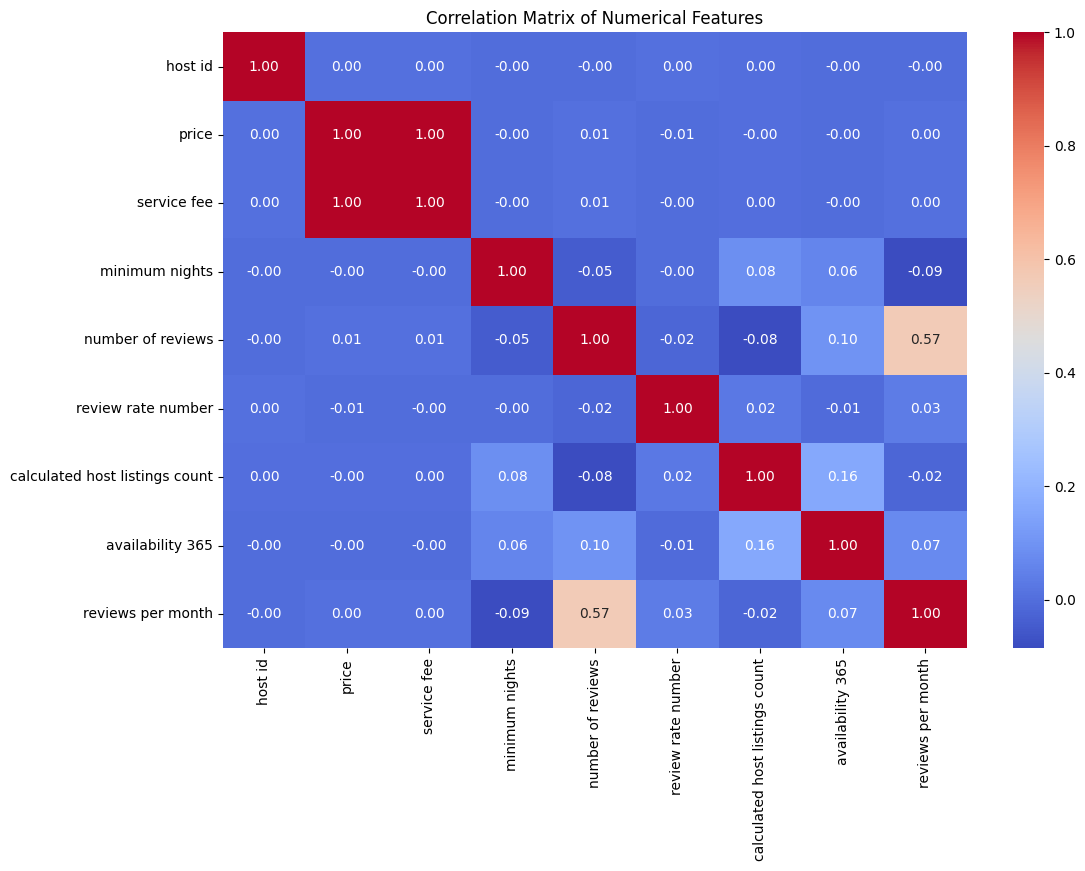

In [ ]:

# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Relationship between Price and Service Fee

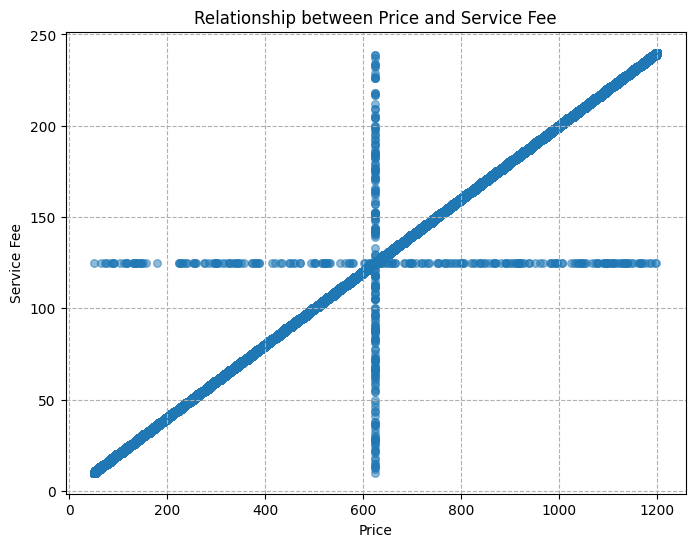

In [ ]:


plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['service fee'],alpha=0.5, s=30)
plt.xlabel('Price')
plt.ylabel('Service Fee')
plt.title('Relationship between Price and Service Fee')
plt.grid(True, linestyle='--')

plt.show()

In the scatter plot, "Relationship between Price and Service Fee," the x-axis represents the price, and the y-axis represents the service fee. The points on the plot show how these two variables are related. For example, you can see that as the price increases, the service fee also tends to increase, forming a diagonal line from the bottom-left to the top-right. There are also some constant patterns, like the vertical line around the 600 mark on the x-axis and the horizontal line around the 100 mark on the y-axis.

This scatter plot suggests a complex relationship between price and service fee, with both linear and constant patterns present.

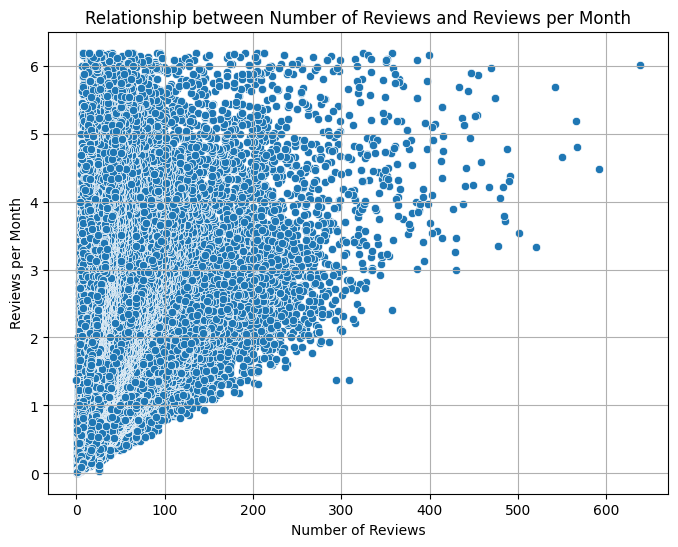

In [ ]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='number of reviews', y='reviews per month', data=df)
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.title('Relationship between Number of Reviews and Reviews per Month')
plt.grid(True)
plt.show()

#Price and Room Type

Room Type Counts:
Entire home/apt: 53166
Private room: 45724
Shared room: 2195
Hotel room: 103


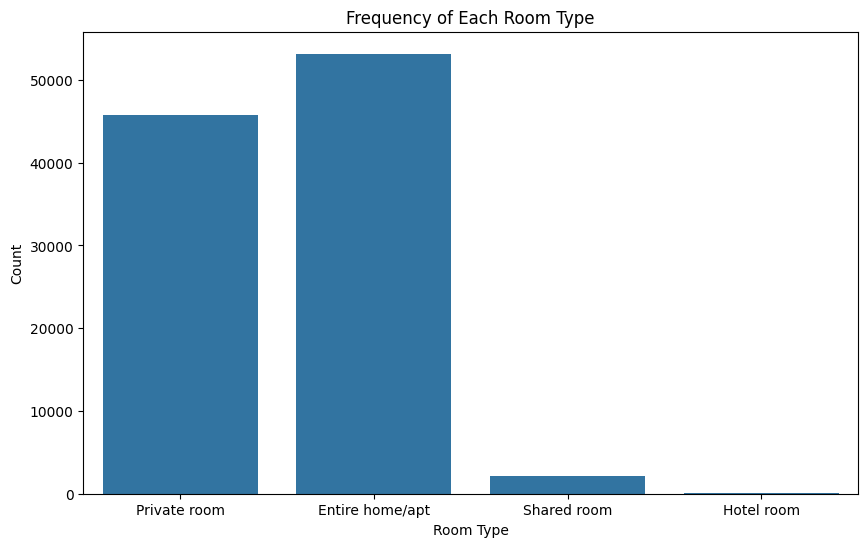

In [ ]:

# Calculate the frequency of each room type
room_type_counts = df['room type'].value_counts()

# Print the frequency of each room type with labels
print("Room Type Counts:")
for room_type, count in room_type_counts.items():
    print(f"{room_type}: {count}")

# Create a bar plot to visualize room type frequencies
plt.figure(figsize=(10, 6))
sns.countplot(x='room type', data=df)
plt.title('Frequency of Each Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

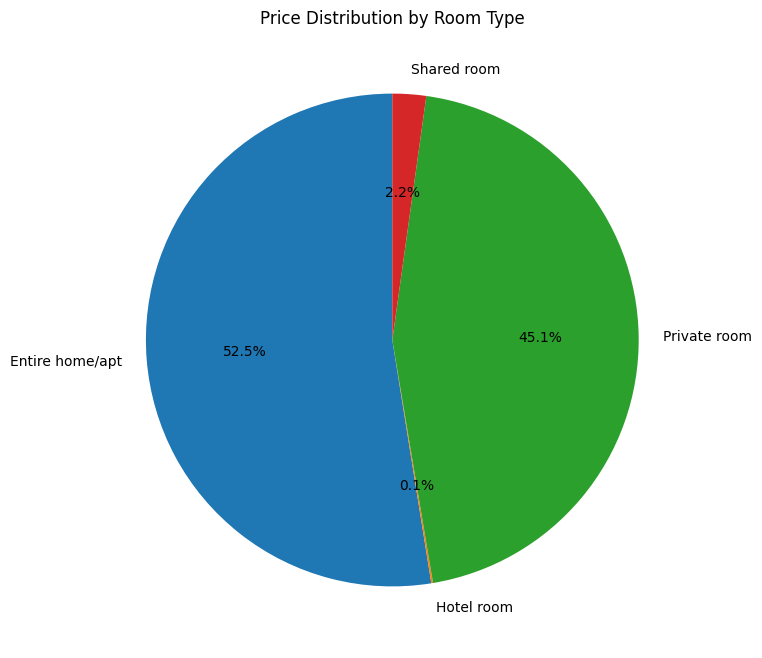

In [ ]:

plt.figure(figsize=(8, 8))
df.groupby('room type')['price'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Price Distribution by Room Type')
plt.ylabel('')  # Remove the y-axis label
plt.show()

#Relationship between Price and Number of Reviews

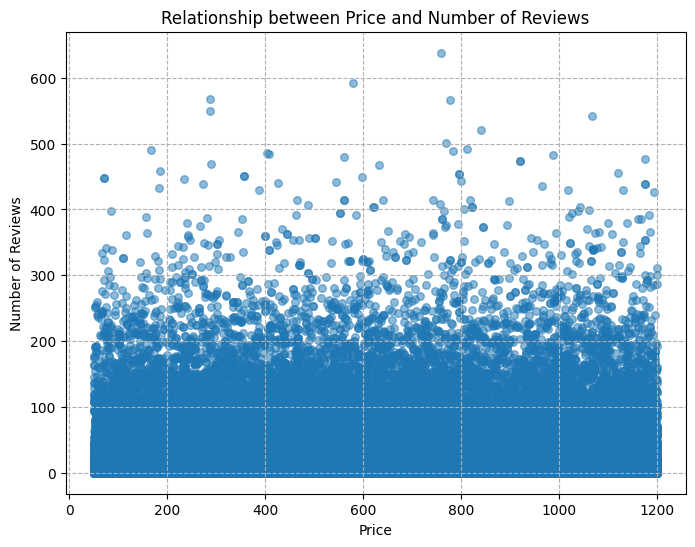

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['number of reviews'], alpha=0.5, s=30)
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Price and Number of Reviews')
plt.grid(True, linestyle='--')
plt.show()

the scatter plot indicates that the number of reviews is not strongly related to the price

#Relationship between Minimum Nights and Number of Reviews

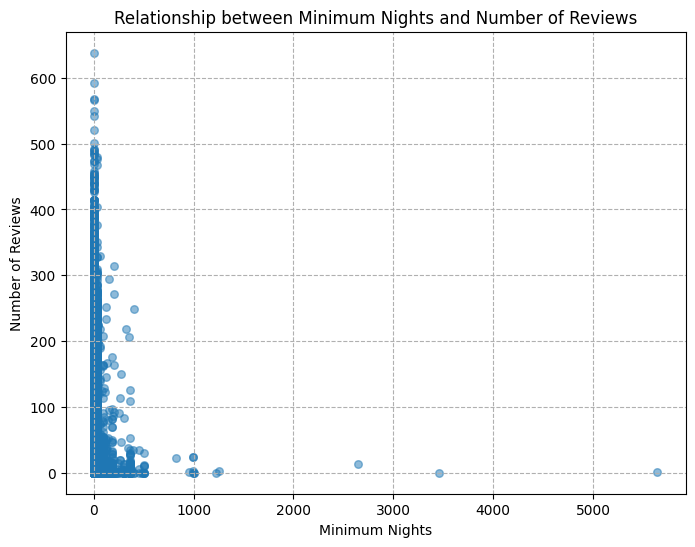

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(df['minimum nights'], df['number of reviews'], alpha=0.5, s=30)
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Minimum Nights and Number of Reviews')
plt.grid(True, linestyle='--')
plt.show()

the scatter plot demonstrates an inverse relationship between the minimum number of nights required for a stay and the number of reviews a listing receives

#Relationship between Minimum Nights and Availability

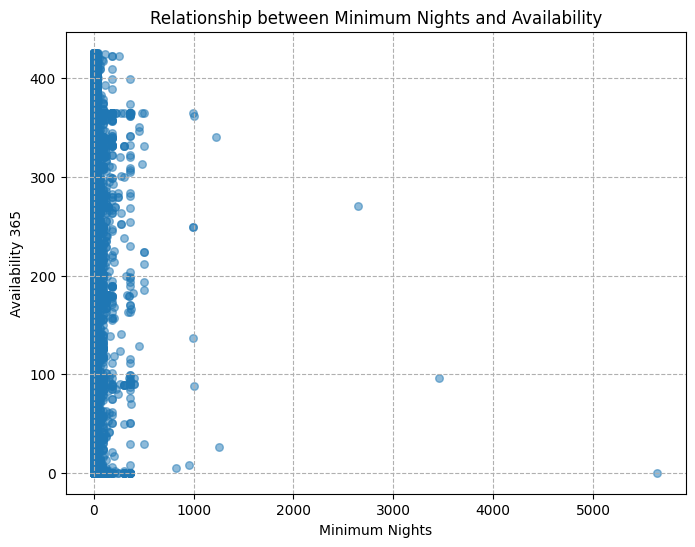

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.scatter(df['minimum nights'], df['availability 365'], alpha=0.5, s=30)
plt.xlabel('Minimum Nights')
plt.ylabel('Availability 365')
plt.title('Relationship between Minimum Nights and Availability')
plt.grid(True, linestyle='--')
plt.show()



Most data points are clustered between 0 and 1000 minimum nights, with availability values ranging from 0 to over 400. There are a few outliers with higher minimum nights, extending up to over 5000. The plot visually represents how the minimum number of nights required for a stay correlates with the availability of those stays throughout the year



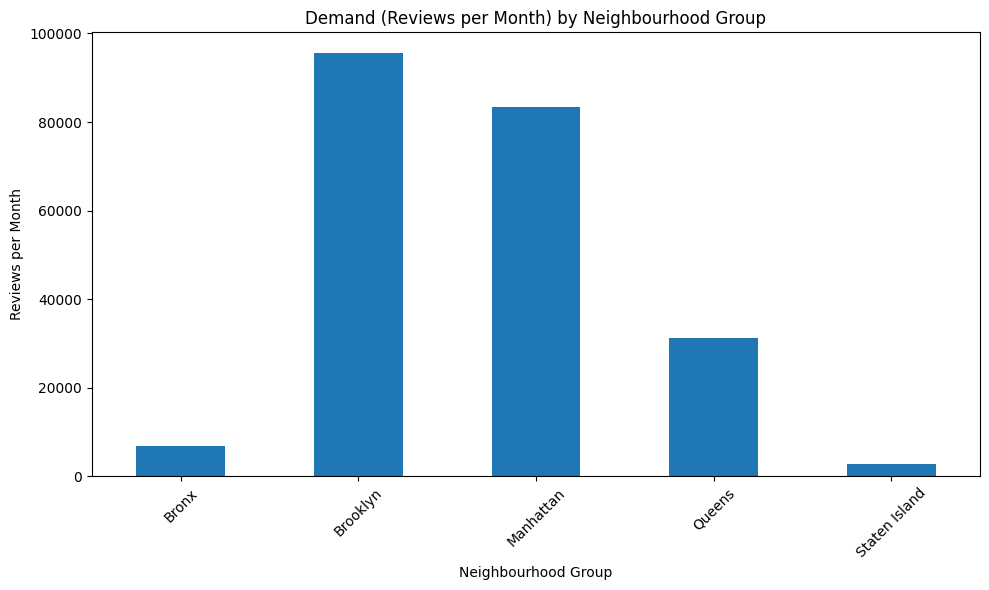

In [ ]:

# Group data by neighbourhood group and calculate the total number of reviews per month
reviews_per_month = df.groupby('neighbourhood group')['number of reviews'].sum() / 12

# Plot the demand (number of reviews per month) by neighbourhood group
plt.figure(figsize=(10, 6))
reviews_per_month.plot(kind='bar')
plt.title('Demand (Reviews per Month) by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Reviews per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



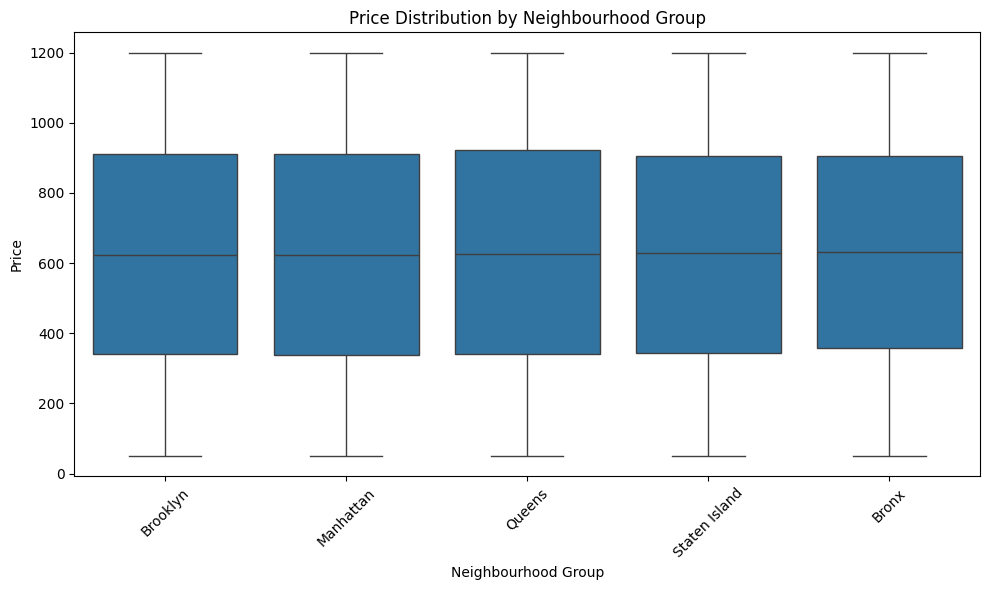

In [ ]:

# Plot the price distribution by neighbourhood group
plt.figure(figsize=(10, 6))
sns.boxplot(x='neighbourhood group', y='price', data=df)
plt.title('Price Distribution by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

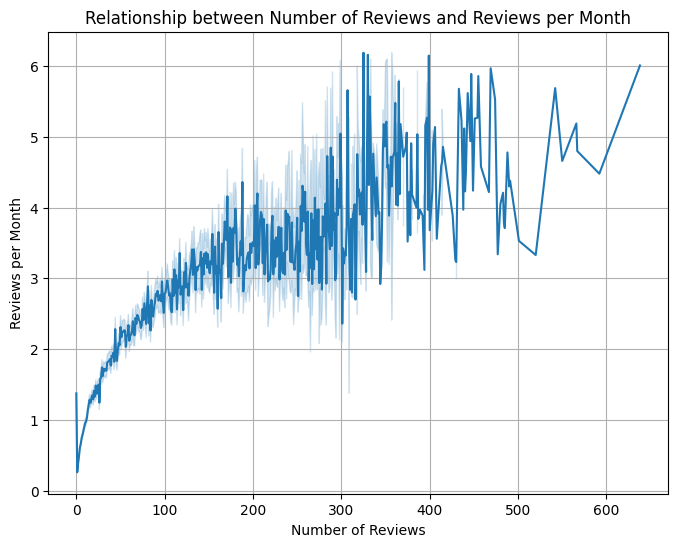

In [ ]:

plt.figure(figsize=(8, 6))
sns.lineplot(x='number of reviews', y='reviews per month', data=df)
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.title('Relationship between Number of Reviews and Reviews per Month')
plt.grid(True)
plt.show()

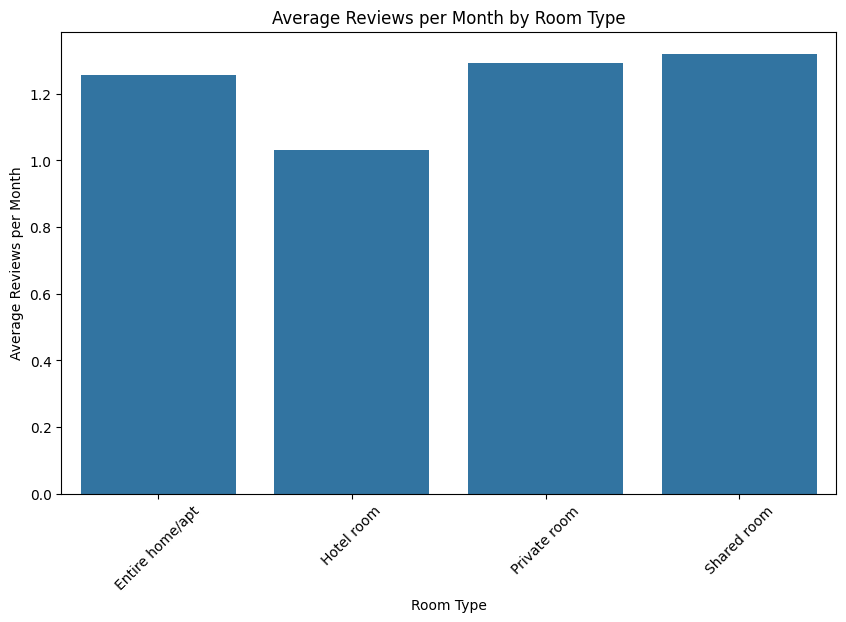

In [ ]:


reviews_by_room_type = df.groupby('room type')['reviews per month'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='reviews per month', data=reviews_by_room_type)
plt.title('Average Reviews per Month by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Reviews per Month')
plt.xticks(rotation=45)
plt.show()

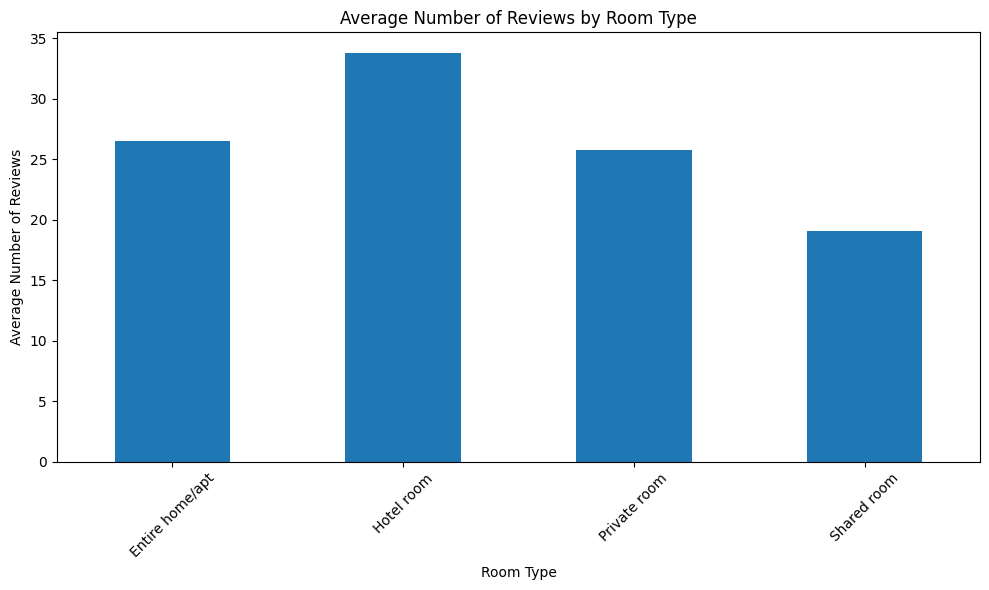

In [ ]:

# Calculate the average review score per room type
avg_reviews_per_room_type = df.groupby('room type')['number of reviews'].mean()

# Create the bar plot
plt.figure(figsize=(10, 6))
avg_reviews_per_room_type.plot(kind='bar')
plt.title('Average Number of Reviews by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

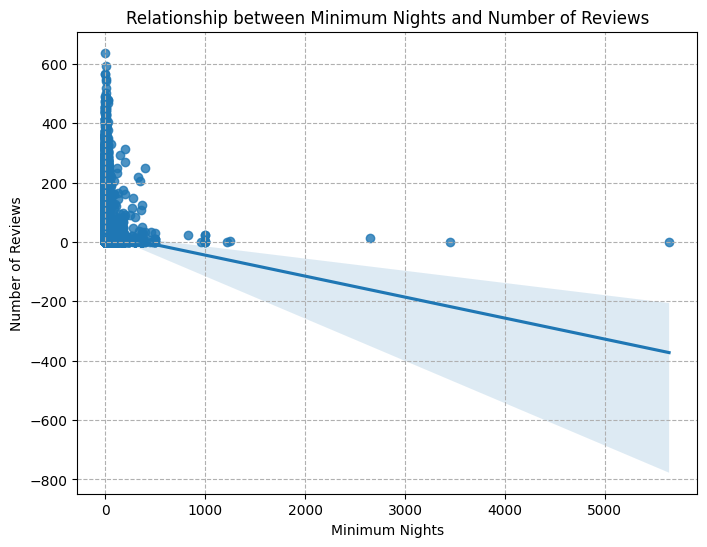

In [ ]:

# Relationship between Minimum Nights and Number of Reviews
plt.figure(figsize=(8, 6))
sns.regplot(x='minimum nights', y='number of reviews', data=df)  # Use regplot for better visualization
plt.xlabel('Minimum Nights')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Minimum Nights and Number of Reviews')
plt.grid(True, linestyle='--')
plt.show()